<a href="https://colab.research.google.com/github/kinba09/LGMVIP-DataScience/blob/main/MusicRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.8 MB/s eta 0:00:00


In [ ]:
pip install xgboost

In [ ]:
import os
import py7zr
import pandas as pd
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split

In [ ]:
os.system('apt-get install p7zip')
!pip install pyunpack
!pip install patool
from pyunpack.cli import Archive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
#test = test.reset_index(drop=True)

In [ ]:
#test

In [ ]:
members = pd.read_csv('members.csv')

In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
songs = pd.read_csv('song_extra_info.csv')

In [ ]:
songs.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
print('train',train.shape)
print('test',test.shape)
print('members',members.shape)
print('songs',songs.shape)

train (7377418, 6)
test (2556790, 6)
members (34403, 7)
songs (2295971, 3)


In [ ]:
train = train.sample(frac=0.01)

In [ ]:
train.shape

(73774, 6)

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
2293493,vQ3yfzDw0vBdBMQ4UZKSZkHlih2kyFjJrC9ovbUuPCw=,TA8T+qI4rqZoUI3/TbMBc0wMPz+eilajCK9ypO+KWYU=,my library,Local playlist more,local-library,1
2969465,2280JdzqfTNyOHJOtbwpF2+ulteGeLrKVZlu7aCkju0=,gYCZbvFEc3qOmPpWK1PE/xumcMgf6dhOlDkQ/QrV2uk=,my library,Local playlist more,local-library,0
7050280,baV/aJPQcAsALgDkWCOvofBw/kYkv+sm73hxsItW0So=,VkDBgh89umc9m6uAEfD6LXngetyGhln4vh/ArCGO0nY=,my library,Local playlist more,local-library,1
296325,uyT/naa8TIRJ/YewI2K4WLm71KLxPcFQ1RSTpUb244A=,WsVr4mozaIQq9Tp8Ks0Iir3HIFTQQSpEDO1AmUIzdsc=,discover,Online playlist more,online-playlist,0
5944563,XHJRZV5Xgcub4dNGuzRj5tVfDD1iwrtoXmdQOWtlc3U=,QZBAXY6al7xhjD2fxFWxoZYBPwblMjqax0i611tQTjM=,radio,Radio,radio,1


In [ ]:
train = pd.merge(train,songs,on = 'song_id',how='left')

In [ ]:
train.shape

(73774, 8)

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,name,isrc
0,vQ3yfzDw0vBdBMQ4UZKSZkHlih2kyFjJrC9ovbUuPCw=,TA8T+qI4rqZoUI3/TbMBc0wMPz+eilajCK9ypO+KWYU=,my library,Local playlist more,local-library,1,I'm Not Yours - feat.安室奈美惠NAMIE AMURO,TWA531457205
1,2280JdzqfTNyOHJOtbwpF2+ulteGeLrKVZlu7aCkju0=,gYCZbvFEc3qOmPpWK1PE/xumcMgf6dhOlDkQ/QrV2uk=,my library,Local playlist more,local-library,0,Tell Me If You Wanna Go Home,USUG11400558
2,baV/aJPQcAsALgDkWCOvofBw/kYkv+sm73hxsItW0So=,VkDBgh89umc9m6uAEfD6LXngetyGhln4vh/ArCGO0nY=,my library,Local playlist more,local-library,1,如果我們不曾相遇 (What If We Had Never Met),TWK231680820
3,uyT/naa8TIRJ/YewI2K4WLm71KLxPcFQ1RSTpUb244A=,WsVr4mozaIQq9Tp8Ks0Iir3HIFTQQSpEDO1AmUIzdsc=,discover,Online playlist more,online-playlist,0,傻子,TWD951249101
4,XHJRZV5Xgcub4dNGuzRj5tVfDD1iwrtoXmdQOWtlc3U=,QZBAXY6al7xhjD2fxFWxoZYBPwblMjqax0i611tQTjM=,radio,Radio,radio,1,Say Something Loving,UK7MC1600072


In [ ]:
train = pd.merge(train,members,on='msno',how ='left')

In [ ]:
train.shape

(73774, 14)

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,vQ3yfzDw0vBdBMQ4UZKSZkHlih2kyFjJrC9ovbUuPCw=,TA8T+qI4rqZoUI3/TbMBc0wMPz+eilajCK9ypO+KWYU=,my library,Local playlist more,local-library,1,I'm Not Yours - feat.安室奈美惠NAMIE AMURO,TWA531457205,1,0,NaN,7,20140110,20171003
1,2280JdzqfTNyOHJOtbwpF2+ulteGeLrKVZlu7aCkju0=,gYCZbvFEc3qOmPpWK1PE/xumcMgf6dhOlDkQ/QrV2uk=,my library,Local playlist more,local-library,0,Tell Me If You Wanna Go Home,USUG11400558,14,65,male,9,20060227,20180610
2,baV/aJPQcAsALgDkWCOvofBw/kYkv+sm73hxsItW0So=,VkDBgh89umc9m6uAEfD6LXngetyGhln4vh/ArCGO0nY=,my library,Local playlist more,local-library,1,如果我們不曾相遇 (What If We Had Never Met),TWK231680820,1,0,NaN,4,20151202,20171205
3,uyT/naa8TIRJ/YewI2K4WLm71KLxPcFQ1RSTpUb244A=,WsVr4mozaIQq9Tp8Ks0Iir3HIFTQQSpEDO1AmUIzdsc=,discover,Online playlist more,online-playlist,0,傻子,TWD951249101,1,0,NaN,7,20131224,20170923
4,XHJRZV5Xgcub4dNGuzRj5tVfDD1iwrtoXmdQOWtlc3U=,QZBAXY6al7xhjD2fxFWxoZYBPwblMjqax0i611tQTjM=,radio,Radio,radio,1,Say Something Loving,UK7MC1600072,1,0,NaN,9,20161222,20170930


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    73774 non-null  object
 1   song_id                 73774 non-null  object
 2   source_system_tab       73532 non-null  object
 3   source_screen_name      69584 non-null  object
 4   source_type             73556 non-null  object
 5   target                  73774 non-null  int64 
 6   name                    73758 non-null  object
 7   isrc                    67860 non-null  object
 8   city                    73774 non-null  int64 
 9   bd                      73774 non-null  int64 
 10  gender                  44006 non-null  object
 11  registered_via          73774 non-null  int64 
 12  registration_init_time  73774 non-null  int64 
 13  expiration_date         73774 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 8.4+ MB


In [ ]:
train.isnull().sum()/train.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.328029
source_screen_name         5.679508
source_type                0.295497
target                     0.000000
name                       0.021688
isrc                       8.016374
city                       0.000000
bd                         0.000000
gender                    40.350259
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [ ]:
for i in train.select_dtypes(include = ['object']).columns:
    train[i][train[i].isnull()]='unknown'
train = train.fillna(value =0)

C:\Users\khirran\AppData\Local\Temp\ipykernel_7220\1369607987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i][train[i].isnull()]='unknown'
C:\Users\khirran\AppData\Local\Temp\ipykernel_7220\1369607987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i][train[i].isnull()]='unknown'
C:\Users\khirran\AppData\Local\Temp\ipykernel_7220\1369607987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i][train[i].isn

In [ ]:
train.registration_init_time = pd.to_datetime(train.registration_init_time,format = '%Y%m%d',errors = 'ignore')
train['registration_init_time_year'] = train['registration_init_time'].dt.year
train['registration_init_time_month'] = train['registration_init_time'].dt.month
train['registration_init_time_day'] = train['registration_init_time'].dt.day

train.expiration_date = pd.to_datetime(train.expiration_date,format = '%Y%m%d',errors ='ignore')
train['expiration_date_year'] = train['expiration_date'].dt.year
train['expiration_date_month'] = train['expiration_date'].dt.month
train['expiration_date_day'] = train['expiration_date'].dt.day

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,vQ3yfzDw0vBdBMQ4UZKSZkHlih2kyFjJrC9ovbUuPCw=,TA8T+qI4rqZoUI3/TbMBc0wMPz+eilajCK9ypO+KWYU=,my library,Local playlist more,local-library,1,I'm Not Yours - feat.安室奈美惠NAMIE AMURO,TWA531457205,1,0,unknown,7,2014-01-10,2017-10-03,2014,1,10,2017,10,3
1,2280JdzqfTNyOHJOtbwpF2+ulteGeLrKVZlu7aCkju0=,gYCZbvFEc3qOmPpWK1PE/xumcMgf6dhOlDkQ/QrV2uk=,my library,Local playlist more,local-library,0,Tell Me If You Wanna Go Home,USUG11400558,14,65,male,9,2006-02-27,2018-06-10,2006,2,27,2018,6,10
2,baV/aJPQcAsALgDkWCOvofBw/kYkv+sm73hxsItW0So=,VkDBgh89umc9m6uAEfD6LXngetyGhln4vh/ArCGO0nY=,my library,Local playlist more,local-library,1,如果我們不曾相遇 (What If We Had Never Met),TWK231680820,1,0,unknown,4,2015-12-02,2017-12-05,2015,12,2,2017,12,5
3,uyT/naa8TIRJ/YewI2K4WLm71KLxPcFQ1RSTpUb244A=,WsVr4mozaIQq9Tp8Ks0Iir3HIFTQQSpEDO1AmUIzdsc=,discover,Online playlist more,online-playlist,0,傻子,TWD951249101,1,0,unknown,7,2013-12-24,2017-09-23,2013,12,24,2017,9,23
4,XHJRZV5Xgcub4dNGuzRj5tVfDD1iwrtoXmdQOWtlc3U=,QZBAXY6al7xhjD2fxFWxoZYBPwblMjqax0i611tQTjM=,radio,Radio,radio,1,Say Something Loving,UK7MC1600072,1,0,unknown,9,2016-12-22,2017-09-30,2016,12,22,2017,9,30


In [ ]:
train['registration_init_time']=train['registration_init_time'].astype('category')
train['expiration_date']=train['expiration_date'].astype('category')

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,vQ3yfzDw0vBdBMQ4UZKSZkHlih2kyFjJrC9ovbUuPCw=,TA8T+qI4rqZoUI3/TbMBc0wMPz+eilajCK9ypO+KWYU=,my library,Local playlist more,local-library,1,I'm Not Yours - feat.安室奈美惠NAMIE AMURO,TWA531457205,1,0,unknown,7,2014-01-10,2017-10-03,2014,1,10,2017,10,3
1,2280JdzqfTNyOHJOtbwpF2+ulteGeLrKVZlu7aCkju0=,gYCZbvFEc3qOmPpWK1PE/xumcMgf6dhOlDkQ/QrV2uk=,my library,Local playlist more,local-library,0,Tell Me If You Wanna Go Home,USUG11400558,14,65,male,9,2006-02-27,2018-06-10,2006,2,27,2018,6,10
2,baV/aJPQcAsALgDkWCOvofBw/kYkv+sm73hxsItW0So=,VkDBgh89umc9m6uAEfD6LXngetyGhln4vh/ArCGO0nY=,my library,Local playlist more,local-library,1,如果我們不曾相遇 (What If We Had Never Met),TWK231680820,1,0,unknown,4,2015-12-02,2017-12-05,2015,12,2,2017,12,5
3,uyT/naa8TIRJ/YewI2K4WLm71KLxPcFQ1RSTpUb244A=,WsVr4mozaIQq9Tp8Ks0Iir3HIFTQQSpEDO1AmUIzdsc=,discover,Online playlist more,online-playlist,0,傻子,TWD951249101,1,0,unknown,7,2013-12-24,2017-09-23,2013,12,24,2017,9,23
4,XHJRZV5Xgcub4dNGuzRj5tVfDD1iwrtoXmdQOWtlc3U=,QZBAXY6al7xhjD2fxFWxoZYBPwblMjqax0i611tQTjM=,radio,Radio,radio,1,Say Something Loving,UK7MC1600072,1,0,unknown,9,2016-12-22,2017-09-30,2016,12,22,2017,9,30


In [ ]:
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')
for col in train.select_dtypes(include=['category']).columns:
    train[col] = train[col].cat.codes



In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,17502,13500,3,7,3,1,4883,11853,1,0,2,7,2545,599,2014,1,10,2017,10,3
1,1115,19306,3,7,3,0,9883,21005,14,65,1,9,334,848,2006,2,27,2018,6,10
2,11606,14533,3,7,3,1,15340,16008,1,0,2,4,3235,662,2015,12,2,2017,12,5
3,17355,15031,0,10,6,0,13557,14518,1,0,2,7,2528,589,2013,12,24,2017,9,23
4,10315,12345,5,12,7,1,8643,17780,1,0,2,9,3555,596,2016,12,22,2017,9,30


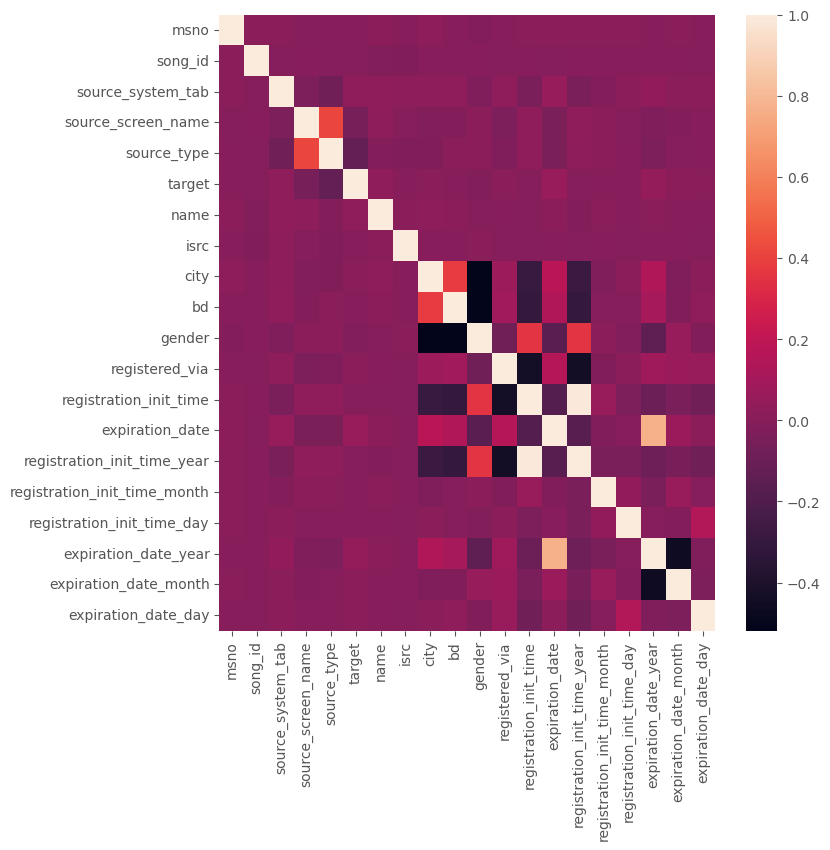

In [ ]:
plt.figure(figsize = [8,8])
sns.heatmap(train.corr())
plt.show()

In [ ]:
train = train.drop(['expiration_date'],1)

C:\Users\khirran\AppData\Local\Temp\ipykernel_7220\209286139.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train = train.drop(['expiration_date'],1)


In [ ]:
train.shape

(73774, 19)

In [ ]:
train_a = train.copy()

In [ ]:
X_train = train_a.drop(['target'],axis= 1).values
Y_train = train_a['target'].values

In [ ]:
X_train.shape

(73774, 18)

In [ ]:
Y_train.shape

(73774,)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,test_size = 0.25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=250,max_depth = 25, random_state =0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(max_depth=25, n_estimators=250, random_state=0)

In [ ]:
train_plot = pd.DataFrame({'Features': train.columns[train.columns != 'target'],
                           'importances': classifier.feature_importances_})

train_plot = train_plot.sort_values('importances', ascending=False)

In [ ]:
#train_plot = pd.DataFrame({'Features': train.columns[train.columns!='traget'],'importances': classifier.feature_importances_})
#train_plot = train_plot.sort_values('importances',ascending = False)

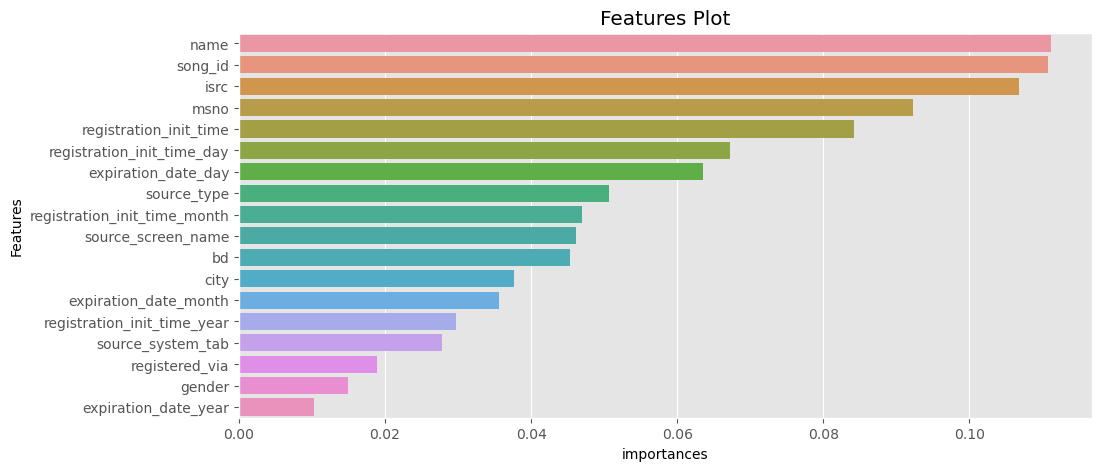

In [ ]:
plt.figure(figsize = [11,5])
sns.barplot(x=train_plot.importances,y=train_plot.Features)
plt.title('Features Plot')
plt.show()

In [ ]:
train_b = train.copy()

In [ ]:
train_b = train_b.drop(train_plot.Features[train_plot.importances < 0.04].tolist(),1)

C:\Users\khirran\AppData\Local\Temp\ipykernel_7220\4056734553.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_b = train_b.drop(train_plot.Features[train_plot.importances < 0.04].tolist(),1)


In [ ]:
train_b.columns

Index(['msno', 'song_id', 'source_screen_name', 'source_type', 'target',
       'name', 'isrc', 'bd', 'registration_init_time',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_day'],
      dtype='object')

In [ ]:
train_b = train.copy()

In [ ]:
X = train_b.drop(['target'],axis = 1).values
Y = train_b['target'].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)

In [ ]:
model_b = xgb.XGBClassifier(learning_rate = 0.1,max_depths = 15,min_child_weight = 5, n_estimators = 250)
model_b.fit(X,Y)

[10:37:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depths" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_depths=15,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
X.shape

(73774, 18)

In [ ]:
Prediction = model_b.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,Prediction))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70      9230
           1       0.69      0.72      0.71      9214

    accuracy                           0.70     18444
   macro avg       0.70      0.70      0.70     18444
weighted avg       0.70      0.70      0.70     18444

